In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [2]:
# Load dataset
credit_data = pd.read_csv('credit_score_data.csv')
credit_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",23.0,7.0,11.50,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",18.0,7.0,11.50,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"auto loan,student loan",20.0,6.0,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
# Basic info
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
# Checking for missing values
credit_data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [5]:
# Check for duplicates
credit_data.duplicated().sum()

0

In [6]:
credit_data.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


In [7]:
# Drop irrelevent columns
credit_data.drop(columns=['ID', 'Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age'], inplace=True)

### Exploratory Data Analysis (EDA)

In [8]:
cat_cols = credit_data.select_dtypes('object').columns.difference(['Credit_Score'])
num_cols = credit_data.select_dtypes(exclude='object').columns
target_col = ['Credit_Score']

<AxesSubplot: >

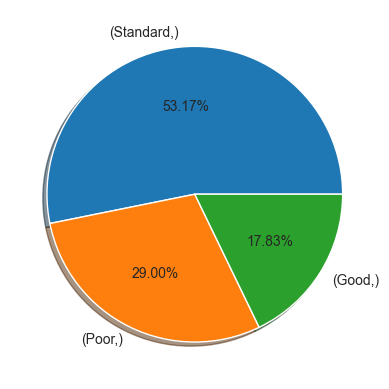

In [9]:
# Credit_Score
credit_data[target_col].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True)

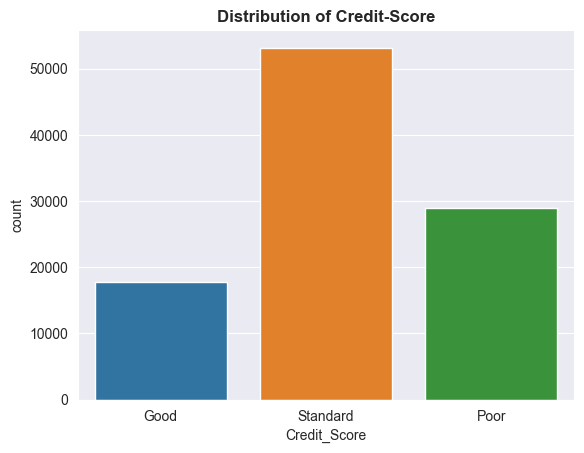

In [10]:
sns.countplot(x='Credit_Score', data=credit_data)
plt.title("Distribution of Credit-Score", fontweight='bold')
plt.show()

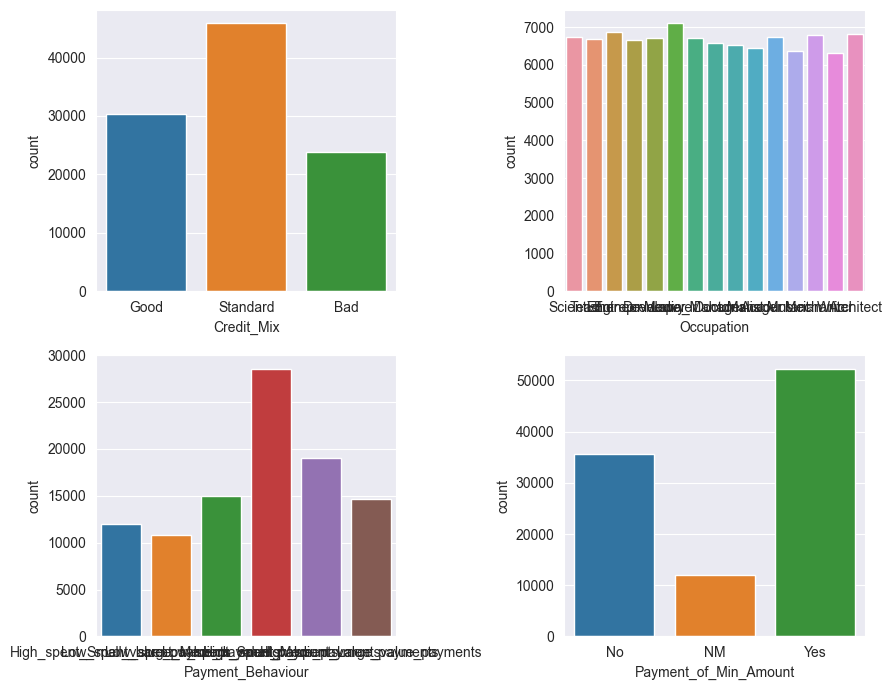

In [11]:
plt.figure(figsize=(9,7))
for index, c in enumerate(cat_cols):
    plt.subplot(2,2, index+1)
    sns.countplot(x=c, data=credit_data)
plt.tight_layout()

##### Features like 'Occupation' and ' Payment_Behavior' is a little bit messy. So, let's plot them individually.

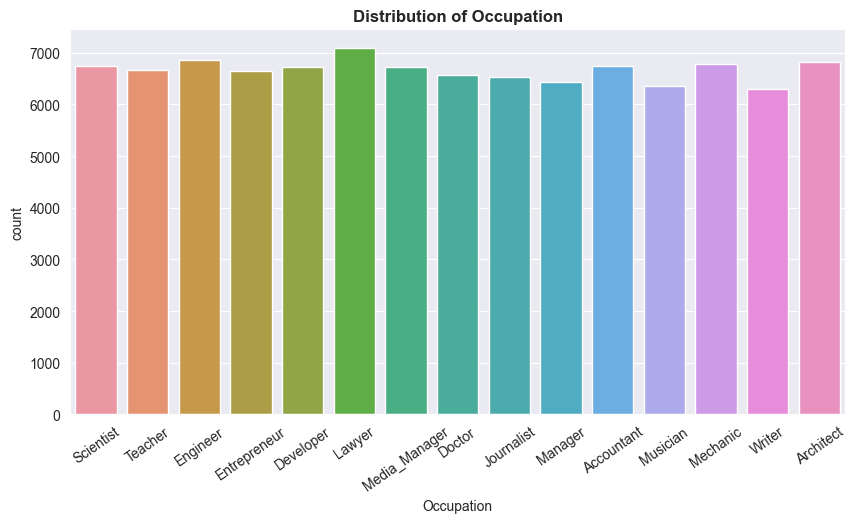

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation', data=credit_data)
plt.title("Distribution of Occupation", fontweight='bold')
plt.xticks(rotation=35)
plt.show()

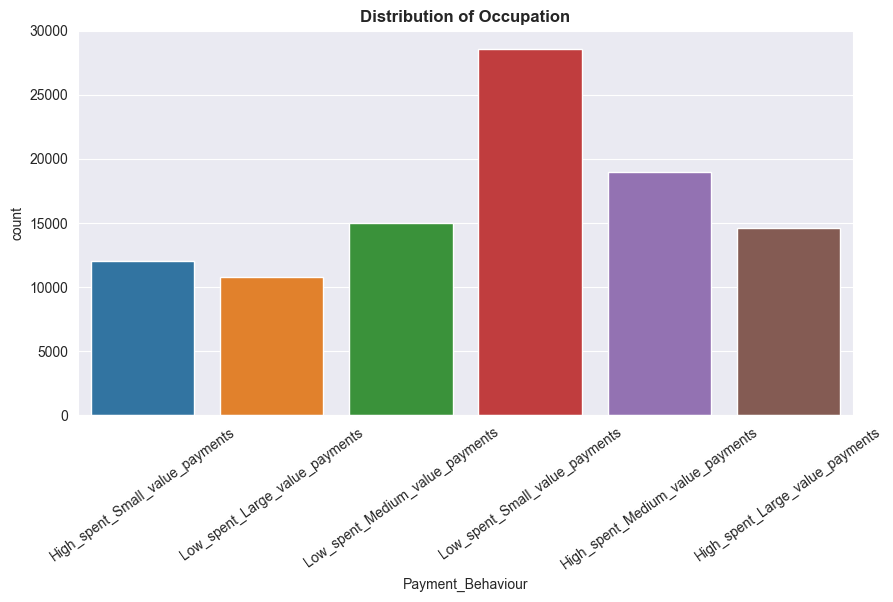

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Payment_Behaviour', data=credit_data)
plt.title("Distribution of Occupation", fontweight='bold')
plt.xticks(rotation=35)
plt.show()

In [14]:
cat_cols

Index(['Credit_Mix', 'Occupation', 'Payment_Behaviour',
       'Payment_of_Min_Amount'],
      dtype='object')

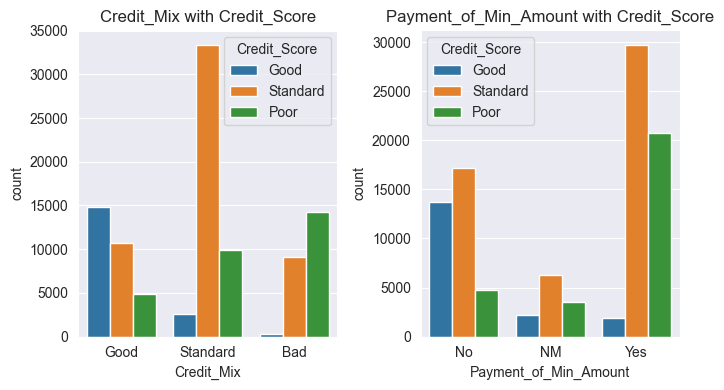

In [15]:
plt.figure(figsize=(7,4))
for index, i in enumerate(['Credit_Mix', 'Payment_of_Min_Amount']):
    plt.subplot(1,2, index+1)
    sns.countplot(x=i, data=credit_data, hue='Credit_Score')
    plt.title(f"{i} with Credit_Score")
plt.tight_layout()

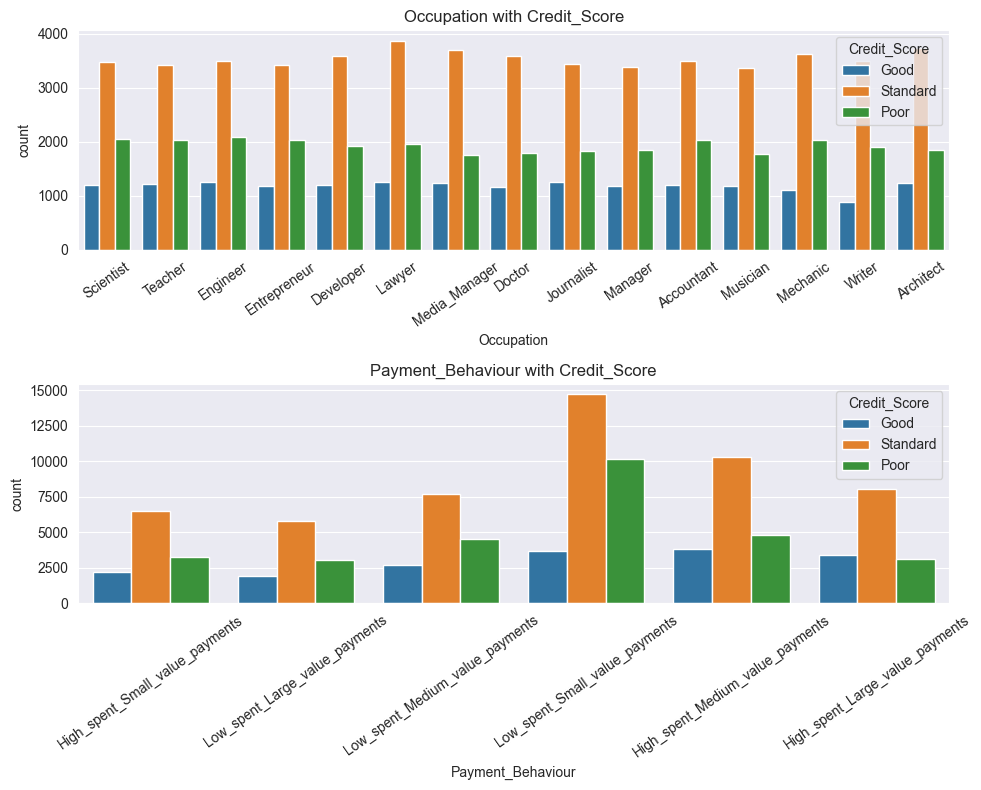

In [16]:
plt.figure(figsize=(10,8))
for index, i in enumerate(['Occupation', 'Payment_Behaviour']):
    plt.subplot(2,1, index+1)
    sns.countplot(x=i, data=credit_data, hue='Credit_Score')
    plt.title(f"{i} with Credit_Score")
    plt.xticks(rotation=35)
plt.tight_layout()

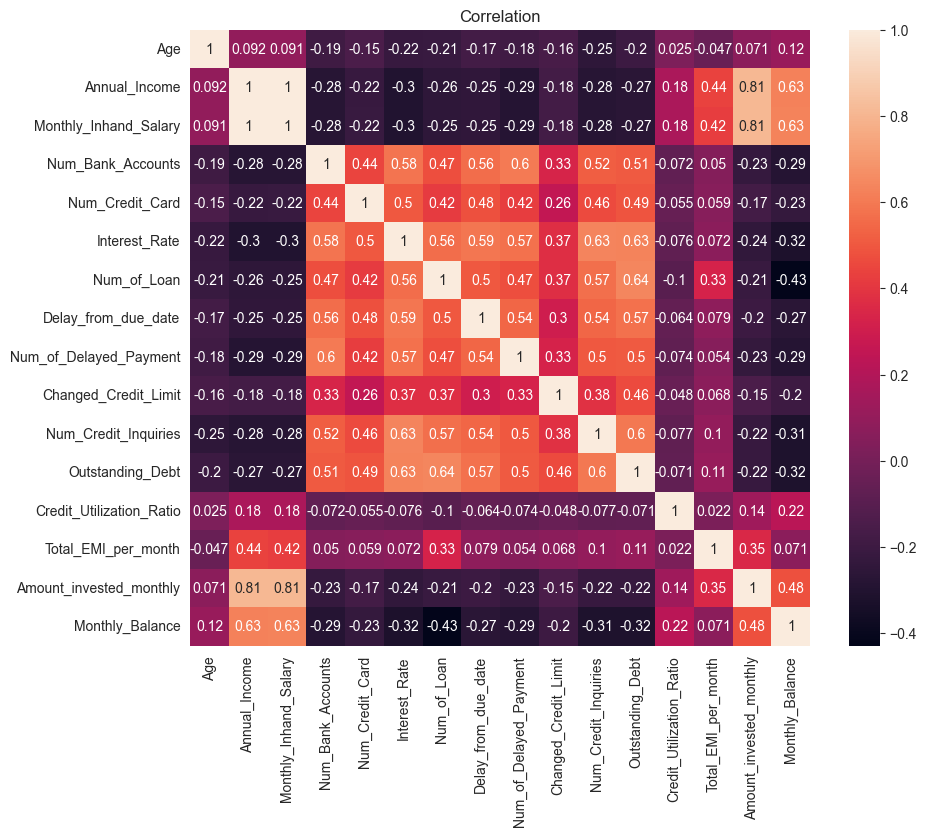

In [17]:
corr = credit_data[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation")
plt.show()

In [18]:
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

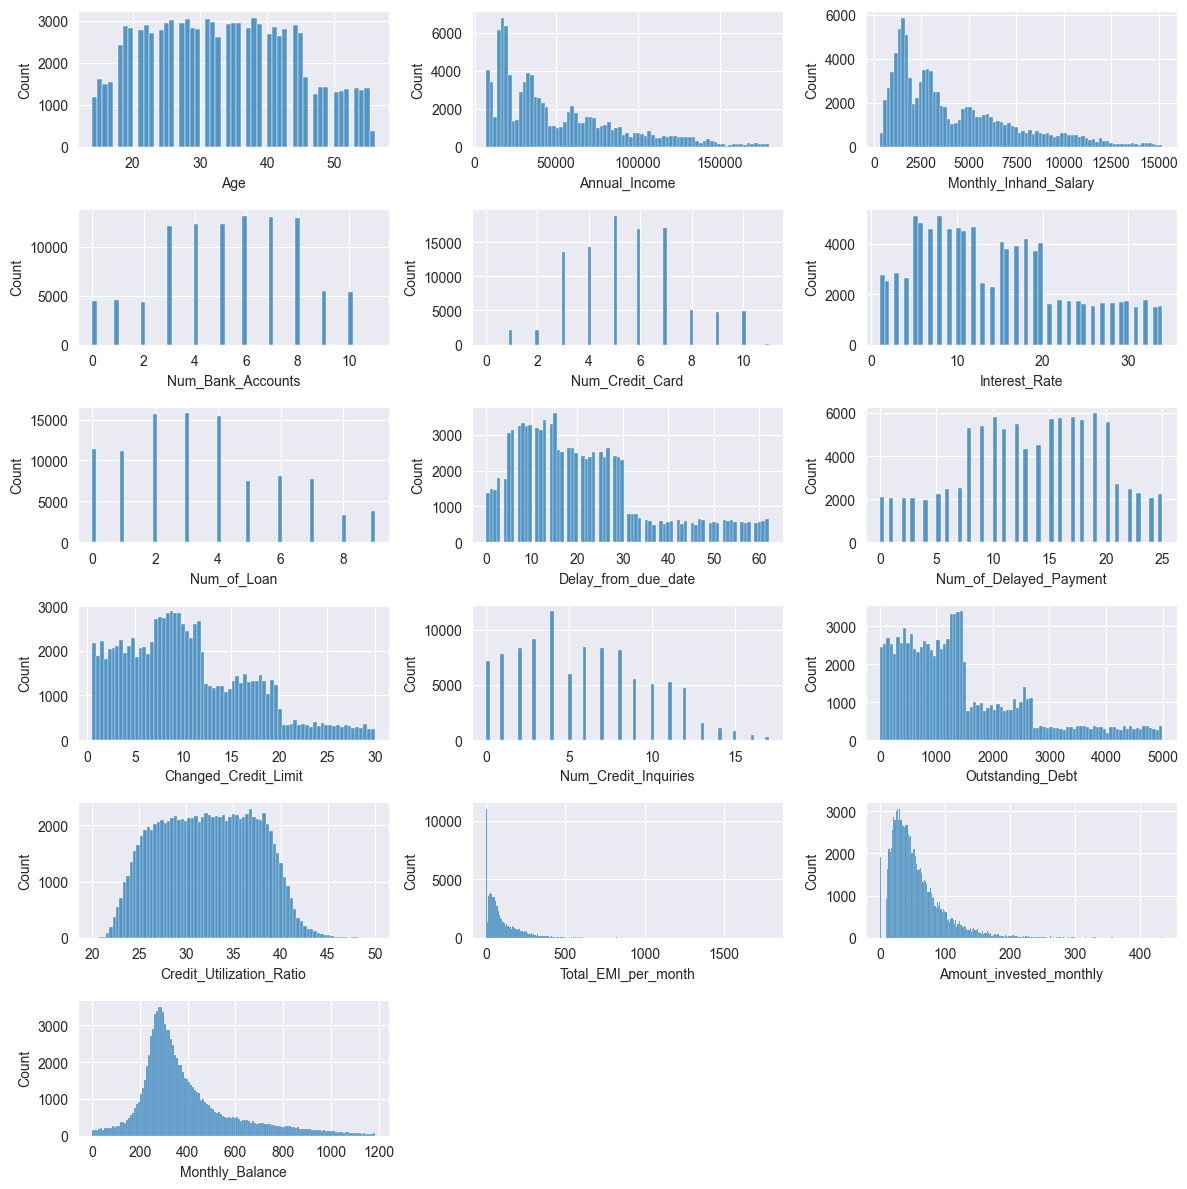

In [19]:
plt.figure(figsize=(12,12))
for index,i in enumerate(num_cols):
    plt.subplot(6,3, index+1)
    sns.histplot(x=i, data=credit_data)
plt.tight_layout()


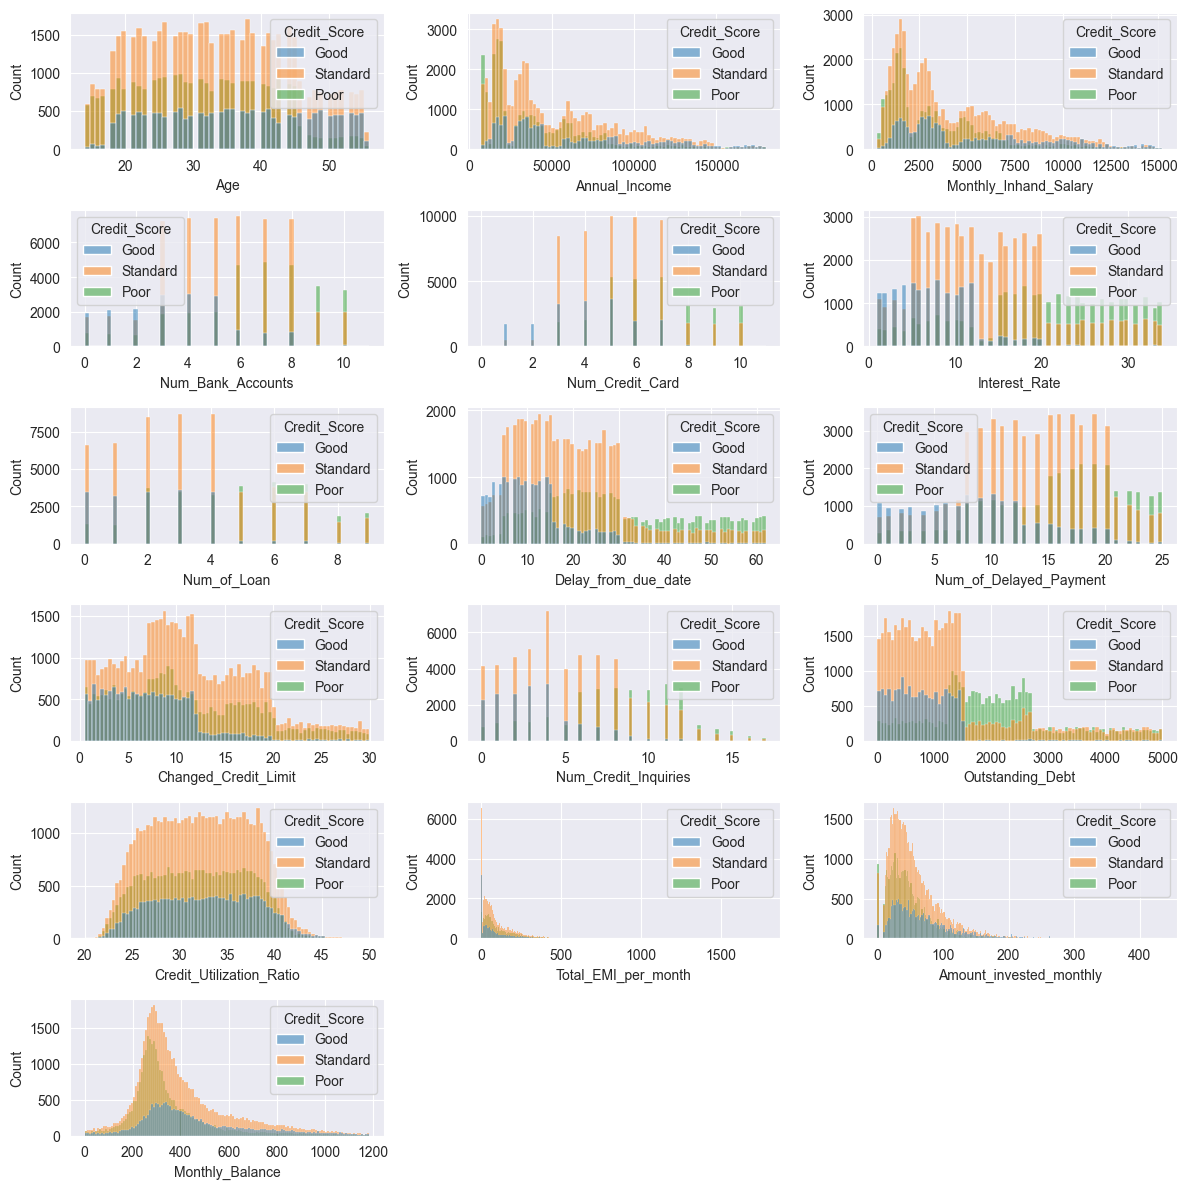

In [20]:
plt.figure(figsize=(12,12))
for index,i in enumerate(num_cols):
    plt.subplot(6,3, index+1)
    sns.histplot(x=i, data=credit_data, hue='Credit_Score')
plt.tight_layout()

### Data Preprocessing

In [21]:
x = credit_data.drop(columns=['Credit_Score'])
y = credit_data['Credit_Score']

In [22]:
# Data partioning
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [23]:
categorical_nominal_columns = X_train.select_dtypes('object').columns.difference(['Credit_Mix'])
categorical_ordinal_column = ['Credit_Mix']
numerical_columns = X_train.select_dtypes(exclude='object').columns

In [24]:
cat_ordinal_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='most_frequent')),
    ('oe', OrdinalEncoder(categories=[['Bad','Standard','Good']])),
    ('ss', StandardScaler(with_mean=False))
])

In [25]:
cat_nominal_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first')),
    ('ss', StandardScaler(with_mean=False))
])

In [26]:
num_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='median')),
    ('ss', StandardScaler(with_mean=False))
])

In [27]:
preprocessor = ColumnTransformer([
    ('cat_ordinal_pipeline', cat_ordinal_pipeline, categorical_ordinal_column),
    ('cat_nominal_pipeline', cat_nominal_pipeline, categorical_nominal_columns),
    ('num_pipeline', num_pipeline, numerical_columns)
])

In [29]:
le = LabelEncoder()
y_train_arr = le.fit_transform(y_train)
y_test_arr = le.transform(y_test)

In [30]:
X_train_arr = preprocessor.fit_transform(X_train)
X_test_arr = preprocessor.transform(X_test)

In [ ]:
# Model evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_arr, y_train_arr)
    
    y_train_pred = model.predict(X_train_arr)
    y_test_pred = model.predict(X_test_arr)
    
    model_train_accuracy_score = accuracy_score(y_train_arr, y_train_pred)
    model_test_accuracy_score = accuracy_score(y_test_arr, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance on Train set: ")
    print("Accuracy score : {:.2f}".format(model_train_accuracy_score))
    print()
    print("Model Performance on Test set: ")
    print("Accuracy score : {:.2f}".format(model_test_accuracy_score))
    
    accuracy_list.append(model_test_accuracy_score)
    
    print("="*35)
    print("\n")

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance on Train set: 
Accuracy score : 0.66

Model Performance on Test set: 
Accuracy score : 0.66


Decision tree
Model Performance on Train set: 
Accuracy score : 1.00

Model Performance on Test set: 
Accuracy score : 0.74


Random Forest
Model Performance on Train set: 
Accuracy score : 1.00

Model Performance on Test set: 
Accuracy score : 0.81


AdaBoost
Model Performance on Train set: 
Accuracy score : 0.67

Model Performance on Test set: 
Accuracy score : 0.67




In [ ]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Models', 'accuracy_score']).sort_values(by=[accuracy_score], ascending=False)

### Random Forest

In [31]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train_arr, y_train_arr)

y_test_pred = r_forest.predict(X_test_arr)
print(f"Accuracy score of the model : {accuracy_score(y_test_arr, y_test_pred)*100}%")

0.80865